<a href="https://colab.research.google.com/github/MuhammadNurilHuda/MachineLearningProject/blob/main/Diabetic_foot_thermogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early detection of diabetic foot using thermograms

## Load data

In [1]:
!wget -O Dataset.zip https://github.com/MuhammadNurilHuda/MachineLearningProject/blob/main/Dataset.zip?raw=true

--2021-10-29 13:32:37--  https://github.com/MuhammadNurilHuda/MachineLearningProject/blob/main/Dataset.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/MuhammadNurilHuda/MachineLearningProject/raw/main/Dataset.zip [following]
--2021-10-29 13:32:37--  https://github.com/MuhammadNurilHuda/MachineLearningProject/raw/main/Dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MuhammadNurilHuda/MachineLearningProject/main/Dataset.zip [following]
--2021-10-29 13:32:38--  https://raw.githubusercontent.com/MuhammadNurilHuda/MachineLearningProject/main/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuser

In [2]:
!rm -r /content/Dataset

rm: cannot remove '/content/Dataset': No such file or directory


In [3]:
import zipfile, os

local_zip = '/content/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
base_dir = '/content/Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_positif_dir = os.path.join(train_dir, 'Positif')
train_negatif_dir = os.path.join(train_dir, 'Negatif')

validation_positif_dir = os.path.join(validation_dir, 'Positif')
validation_negatif_dir = os.path.join(validation_dir, 'Negatif')

In [5]:
positif_dir = os.path.join(base_dir, 'Positif')
negatif_dir = os.path.join(base_dir, 'Negatif')

In [6]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

os.mkdir(train_positif_dir)
os.mkdir(train_negatif_dir)

os.mkdir(validation_positif_dir)
os.mkdir(validation_negatif_dir)

## Split data

In [7]:
from sklearn.model_selection import train_test_split

train_positif, val_positif = train_test_split(os.listdir(positif_dir), test_size = 0.3)
train_negatif, val_negatif = train_test_split(os.listdir(negatif_dir), test_size = 0.3)

In [8]:
import shutil

for f in train_positif:
  shutil.copy(os.path.join(positif_dir, f), os.path.join(train_positif_dir, f))

for f in train_negatif:
  shutil.copy(os.path.join(negatif_dir, f), os.path.join(train_negatif_dir, f))

for f in val_positif:
  shutil.copy(os.path.join(positif_dir, f), os.path.join(validation_positif_dir, f))

for f in val_negatif:
  shutil.copy(os.path.join(negatif_dir, f), os.path.join(validation_negatif_dir, f))

In [9]:
print('total training positif images:', len(os.listdir(train_positif_dir)))
print('total training negatif images:', len(os.listdir(train_negatif_dir)))
print('total validation positif images:', len(os.listdir(validation_positif_dir)))
print('total validation negatif images:', len(os.listdir(validation_negatif_dir)))

total training positif images: 85
total training negatif images: 31
total validation positif images: 37
total validation negatif images: 14


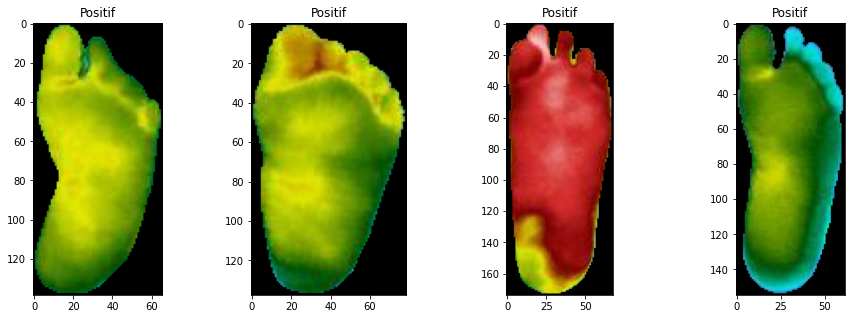

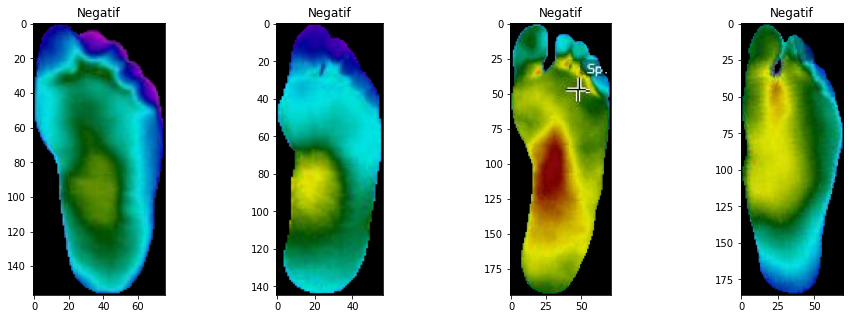

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 5))
for i, img_path in enumerate(train_positif[:4]):
    sp = plt.subplot(1,5,i+1)
    img = mpimg.imread(os.path.join(positif_dir, img_path))
    plt.title('Positif')
    plt.imshow(img)
plt.show()

plt.figure(figsize=(20, 5))
for i, img_path in enumerate(train_negatif[:4]):
    sp = plt.subplot(1,5,i+1)
    img = mpimg.imread(os.path.join(negatif_dir, img_path))
    plt.title('Negatif')
    plt.imshow(img)
plt.show()

## Augmentasi data

In [67]:
# Augmentasi data
# https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator (
    rescale = 1./255, # mwngubah ukuran gambar
    rotation_range = 20, # merotasi gambar
    horizontal_flip = True, # membalik gambar secara horizontal
    shear_range = 0.2, # 
    fill_mode = 'nearest' # default
)

In [68]:
train_generator = datagen.flow_from_directory (
    train_dir,
    target_size=(100,100),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator = datagen.flow_from_directory (
    validation_dir,
    target_size=(100,100),
    batch_size = 32,
    class_mode = 'binary'
)

Found 116 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


## Preprocessing

In [69]:
np.unique(train_generator.classes, return_counts=True)

(array([0, 1], dtype=int32), array([31, 85]))

In [70]:
np.unique(val_generator.classes, return_counts=True)

(array([0, 1], dtype=int32), array([14, 37]))

## Modeling using ANN

In [73]:
import tensorflow as tf

model_ann = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(100,100,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1920064   
_________________________________________________________________
dense_9 (Dense)              (None, 72)                4680      
_________________________________________________________________
dense_10 (Dense)             (None, 80)                5840      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 81        
Total params: 1,930,665
Trainable params: 1,930,665
Non-trainable params: 0
_________________________________________________________________


In [75]:
from tensorflow.keras.optimizers import Adam

# Compile model
model_ann.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [76]:
history_ann = model_ann.fit(train_generator, batch_size=32, epochs=100, validation_data=val_generator)

Epoch 1/100
4/4 [==============================] - 1s 228ms/step - loss: 0.6439 - acc: 0.6293 - val_loss: 0.5264 - val_acc: 0.7255
Epoch 2/100
4/4 [==============================] - 1s 206ms/step - loss: 0.4640 - acc: 0.7414 - val_loss: 0.4559 - val_acc: 0.7451
Epoch 3/100
4/4 [==============================] - 1s 167ms/step - loss: 0.4182 - acc: 0.7586 - val_loss: 0.4472 - val_acc: 0.7059
Epoch 4/100
4/4 [==============================] - 1s 157ms/step - loss: 0.3954 - acc: 0.7759 - val_loss: 0.4298 - val_acc: 0.6471
Epoch 5/100
4/4 [==============================] - 1s 163ms/step - loss: 0.3769 - acc: 0.7759 - val_loss: 0.4178 - val_acc: 0.7843
Epoch 6/100
4/4 [==============================] - 1s 165ms/step - loss: 0.3837 - acc: 0.7759 - val_loss: 0.3984 - val_acc: 0.7843
Epoch 7/100
4/4 [==============================] - 1s 174ms/step - loss: 0.3677 - acc: 0.7931 - val_loss: 0.3955 - val_acc: 0.8039
Epoch 8/100
4/4 [==============================] - 1s 161ms/step - loss: 0.3696 - a

### Plotting

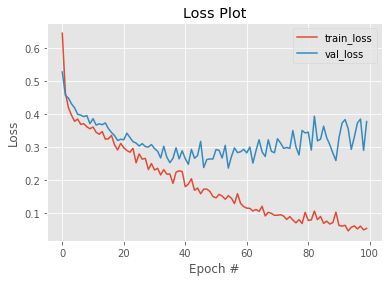

In [80]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history_ann.history["loss"], label="train_loss")
plt.plot(history_ann.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

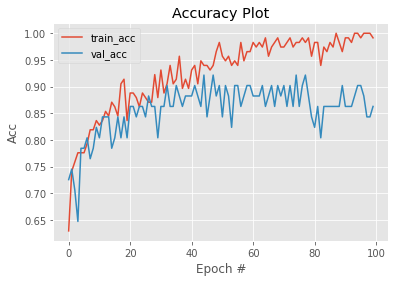

In [82]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history_ann.history["acc"], label="train_acc")
plt.plot(history_ann.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
print("model ANN")
print(classification_report(val_generator.classes, labels))

model ANN
              precision    recall  f1-score   support

           0       0.31      0.29      0.30        14
           1       0.74      0.76      0.75        37

    accuracy                           0.63        51
   macro avg       0.52      0.52      0.52        51
weighted avg       0.62      0.63      0.62        51



## Modeling using CNN

In [13]:
# https://wandb.ai/ayush-thakur/dl-question-bank/reports/Keras-Input-Explanation-input_shape-units-batch_size-dim-etc--VmlldzoyMDIzMDU

import tensorflow as tf

model_cnn_1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(100,100,3)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'), # 2D Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), # Max pooling operation for 2D spatial data
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # Flattens the input. Does not affect the batch size
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       18560     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [14]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', verbose=1, save_best_only=True)

history= model.fit(
    train_generator,
    batch_size=32,
    epochs=100,
    validation_data=val_generator,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/100
4/4 [==============================] - 1s 352ms/step - loss: 0.1187 - accuracy: 0.9828 - val_loss: 0.3605 - val_accuracy: 0.8824

Epoch 00001: val_loss improved from inf to 0.36050, saving model to model.h5
Epoch 2/100
4/4 [==============================] - 1s 339ms/step - loss: 0.1260 - accuracy: 0.9741 - val_loss: 0.3022 - val_accuracy: 0.8824

Epoch 00002: val_loss improved from 0.36050 to 0.30219, saving model to model.h5
Epoch 3/100
4/4 [==============================] - 1s 308ms/step - loss: 0.1218 - accuracy: 0.9828 - val_loss: 0.2752 - val_accuracy: 0.9216

Epoch 00003: val_loss improved from 0.30219 to 0.27516, saving model to model.h5
Epoch 4/100
4/4 [==============================] - 1s 359ms/step - loss: 0.1156 - accuracy: 0.9655 - val_loss: 0.2896 - val_accuracy: 0.9020

Epoch 00004: val_loss did not improve from 0.27516
Epoch 5/100
4/4 [==============================] - 1s 353ms/step - loss: 0.1232 - accuracy: 0.9741 - val_loss: 0.3030 - val_accuracy: 0.8627



In [16]:
score = model.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))


4/4 [==============================] - 1s 125ms/step - loss: 0.1181 - accuracy: 0.9828
Loss: 0.12
Accuracy: 0.98


In [17]:
score = model.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 0s 40ms/step - loss: 0.2814 - accuracy: 0.9020
Loss: 0.28
Accuracy: 0.90


In [18]:
model_cnn_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(100,100,3)),
    tf.keras.layers.Conv2D(72, (3,3), activation='relu'), # 2D Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), # Max pooling operation for 2D spatial data
    tf.keras.layers.Conv2D(80, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # Flattens the input. Does not affect the batch size
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       18560     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [19]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

callbacks2 = tf.keras.callbacks.ModelCheckpoint(filepath='model2.h5', verbose=1, save_best_only=True)

history= model2.fit(
    train_generator,
    batch_size=32,
    epochs=100,
    validation_data=val_generator,
    verbose=1,
    callbacks=callbacks2
)

Epoch 1/100
4/4 [==============================] - 5s 1s/step - loss: 0.6235 - accuracy: 0.6983 - val_loss: 0.5163 - val_accuracy: 0.7255

Epoch 00001: val_loss improved from inf to 0.51626, saving model to model2.h5
Epoch 2/100
4/4 [==============================] - 4s 918ms/step - loss: 0.4698 - accuracy: 0.7328 - val_loss: 0.4678 - val_accuracy: 0.7059

Epoch 00002: val_loss improved from 0.51626 to 0.46785, saving model to model2.h5
Epoch 3/100
4/4 [==============================] - 4s 936ms/step - loss: 0.4277 - accuracy: 0.7328 - val_loss: 0.4446 - val_accuracy: 0.7059

Epoch 00003: val_loss improved from 0.46785 to 0.44457, saving model to model2.h5
Epoch 4/100
4/4 [==============================] - 4s 913ms/step - loss: 0.3971 - accuracy: 0.7672 - val_loss: 0.4274 - val_accuracy: 0.7059

Epoch 00004: val_loss improved from 0.44457 to 0.42741, saving model to model2.h5
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.3858 - accuracy: 0.7931 - val_loss: 0.4

In [20]:
score = model2.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

4/4 [==============================] - 1s 214ms/step - loss: 0.0208 - accuracy: 1.0000
Loss: 0.02
Accuracy: 1.00


In [21]:
score = model2.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 0s 119ms/step - loss: 0.2960 - accuracy: 0.9216
Loss: 0.30
Accuracy: 0.92


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

pred = model.predict(val_generator)
labels = (pred > 0.5).astype(np.int)

pred2 = model2.predict(val_generator)
labels2 = (pred2 > 0.5).astype(np.int)

In [23]:
print("model 1")
print(classification_report(val_generator.classes, labels))
print("model 2")
print(classification_report(val_generator.classes, labels2))

model 1
              precision    recall  f1-score   support

           0       0.31      0.29      0.30        14
           1       0.74      0.76      0.75        37

    accuracy                           0.63        51
   macro avg       0.52      0.52      0.52        51
weighted avg       0.62      0.63      0.62        51

model 2
              precision    recall  f1-score   support

           0       0.21      0.21      0.21        14
           1       0.70      0.70      0.70        37

    accuracy                           0.57        51
   macro avg       0.46      0.46      0.46        51
weighted avg       0.57      0.57      0.57        51

